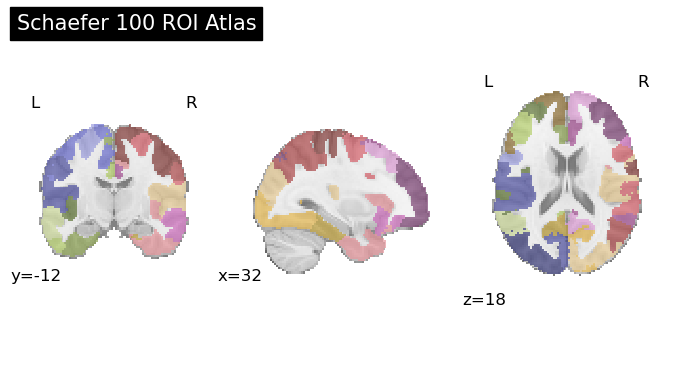

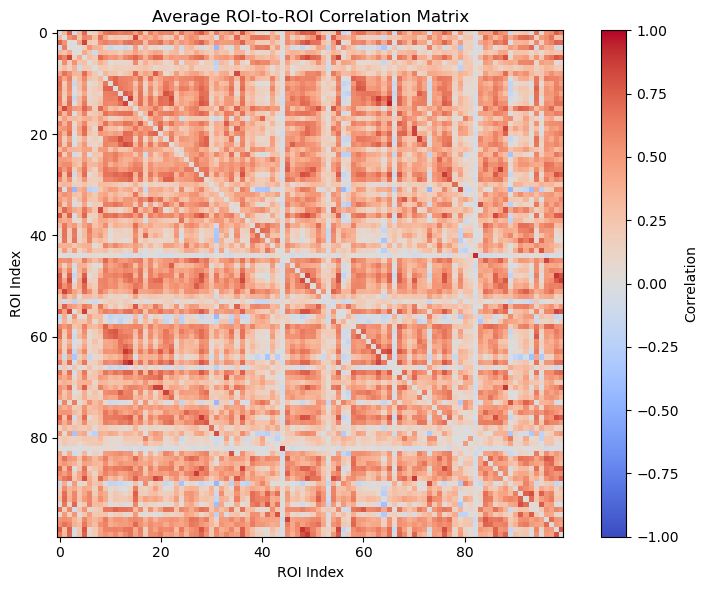

In [2]:
# 🧠 BrainBeats Visualization Notebook: ROIs & Average Correlation Matrix

# --- Imports ---
from nilearn import datasets, plotting
import matplotlib.pyplot as plt
import numpy as np

# --- Load Schaefer 100-ROI Atlas ---
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, resolution_mm=2)
atlas_img = atlas.maps
labels = atlas.labels

# --- Plot the Atlas ---
plotting.plot_roi(atlas_img, title='Schaefer 100 ROI Atlas', draw_cross=False, cmap='tab20b')

# --- Load Connectivity Features ---
# This assumes X_all.npy has shape (n_trials, 4950) from upper triangle of 100x100 matrices
X_all = np.load("X_all.npy")

# --- Reconstruct full 100x100 matrices ---
n_rois = 100
n_trials = X_all.shape[0]
X_full = np.zeros((n_trials, n_rois, n_rois))

triu_indices = np.triu_indices(n_rois, k=1)
for i in range(n_trials):
    mat = np.zeros((n_rois, n_rois))
    mat[triu_indices] = X_all[i]
    mat += mat.T
    X_full[i] = mat

# --- Compute and Plot Average Correlation Matrix ---
avg_corr = np.nanmean(X_full, axis=0)

plt.figure(figsize=(8, 6))
plt.imshow(avg_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Average ROI-to-ROI Correlation Matrix")
plt.colorbar(label="Correlation")
plt.xlabel("ROI Index")
plt.ylabel("ROI Index")
plt.tight_layout()
plt.show()